<a href="https://colab.research.google.com/github/surkhanjay-ops/YOLACT-Instance-Segmentation/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face Mask Detection

In [20]:
#checkj the installed version of the python and install kaggle for dataset

import sys
print(f"Python Version: {sys.version}")

!pip install kaggle

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [21]:
from google.colab import drive
import os
import zipfile

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Define the path to the zip file in Google Drive
zip_file_name = 'archive.zip'
zip_file_path = f'/content/drive/MyDrive/{zip_file_name}' # Assumes it's in the root of My Drive
extraction_path = './extracted_archive'

# Check if the zip file exists
if os.path.exists(zip_file_path):
    print(f"Found {zip_file_name} at {zip_file_path}")

    # Create extraction directory if it doesn't exist
    os.makedirs(extraction_path, exist_ok=True)

    # Unzip the file
    print(f"Extracting {zip_file_name} to {extraction_path}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)
    print("Extraction complete.")

    # List contents of the extracted directory to confirm
    print(f"Contents of {extraction_path}:")
    !ls {extraction_path}
else:
    print(f"Error: {zip_file_name} not found at {zip_file_path}. Please ensure the file is in your Google Drive's root directory and spelled correctly.")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found archive.zip at /content/drive/MyDrive/archive.zip
Extracting archive.zip to ./extracted_archive...
Extraction complete.
Contents of ./extracted_archive:
'Face Mask Dataset'


In [22]:
!ls #find the files in the directory

drive  extracted_archive  sample_data


#Dependencies import

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
with_mask_files = os.listdir('/content/extracted_archive/Face Mask Dataset/Train/WithMask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['Augmented_727_5172650.png', 'Augmented_775_7792723.png', 'Augmented_742_6674290.png', 'Augmented_700_662656.png', '1322.png']
['Augmented_212_6757887.png', '1042.png', 'Augmented_789_5588314.png', 'Augmented_209_7247738.png', 'Augmented_688_1151331.png']


In [6]:
without_mask_files = os.listdir('/content/extracted_archive/Face Mask Dataset/Train/WithoutMask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['4342.png', '3546.png', '4281.png', '5202.png', '5569.png']
['5522.png', '3071.png', '4273.png', '1042.png', '3529.png']


In [7]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 5000
Number of without mask images: 5000


Creating labels for the two class of images

With mask = 1

Without mask = 0

In [8]:
# create the labels

with_mask_labels = [1]*5000

without_mask_labels = [0]*5000

In [18]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

5000
5000


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

10000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


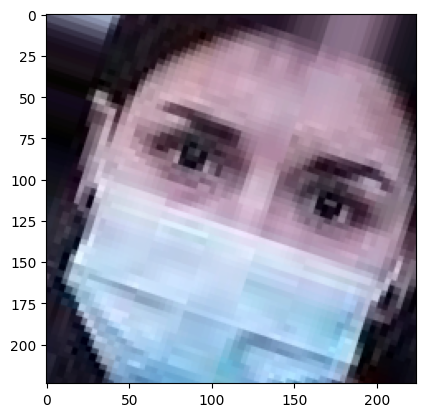

In [31]:
# displaying with mask image
img = mpimg.imread('/content/extracted_archive/Face Mask Dataset/Train/WithMask/Augmented_155_6618904.png')
imgplot = plt.imshow(img)
plt.show()

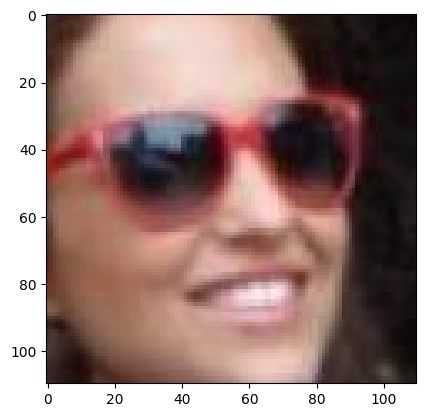

In [32]:
# displaying without mask image
img = mpimg.imread('/content/extracted_archive/Face Mask Dataset/Train/WithoutMask/1644.png')
imgplot = plt.imshow(img)
plt.show()

Image processing

1) Resizing the Images
2) Covert the image into the numpy arrays

In [9]:
# Re-initialize with_mask_files with the correct directory
import os

with_mask_files = os.listdir('/content/extracted_archive/Face Mask Dataset/Train/WithMask')
print(f"Corrected 'WithMask' files sample: {with_mask_files[0:5]}")

Corrected 'WithMask' files sample: ['Augmented_727_5172650.png', 'Augmented_775_7792723.png', 'Augmented_742_6674290.png', 'Augmented_700_662656.png', '1322.png']


In [10]:
# Re-initialize without_mask_files with the correct directory
without_mask_files = os.listdir('/content/extracted_archive/Face Mask Dataset/Train/WithoutMask')
print(f"Corrected 'WithoutMask' files sample: {without_mask_files[0:5]}")

Corrected 'WithoutMask' files sample: ['4342.png', '3546.png', '4281.png', '5202.png', '5569.png']


In [11]:
import numpy as np
from PIL import Image

# convert images to numpy arrays

with_mask_path = '/content/extracted_archive/Face Mask Dataset/Train/WithMask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/extracted_archive/Face Mask Dataset/Train/WithoutMask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

print(f"Successfully processed {len(data)} images.")

Successfully processed 10000 images.


In [36]:
!nvidia-smi

Tue Jan 27 18:39:23 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [44]:
type(data)

list

In [45]:
len(data)

10000

array([[[127, 112, 107],
        [128, 113, 108],
        [131, 116, 111],
        ...,
        [ 61,  51,  41],
        [ 62,  52,  42],
        [ 62,  52,  42]],

       [[127, 112, 107],
        [127, 112, 107],
        [127, 112, 107],
        ...,
        [ 62,  52,  42],
        [ 62,  52,  42],
        [ 61,  51,  42]],

       [[128, 112, 107],
        [127, 112, 107],
        [127, 112, 107],
        ...,
        [ 62,  52,  42],
        [ 62,  52,  42],
        [ 60,  49,  40]],

       ...,

       [[ 61,  46,  43],
        [ 56,  42,  40],
        [ 49,  37,  35],
        ...,
        [ 97,  82,  74],
        [ 96,  81,  73],
        [ 96,  81,  73]],

       [[ 59,  45,  41],
        [ 55,  42,  39],
        [ 55,  42,  39],
        ...,
        [ 86,  70,  63],
        [ 89,  74,  66],
        [ 92,  76,  68]],

       [[ 58,  43,  40],
        [ 56,  42,  39],
        [ 55,  42,  39],
        ...,
        [ 79,  62,  54],
        [ 80,  63,  55],
        [ 80,  63,  55]]], dtype=uint8)
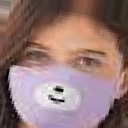

In [14]:
data[0]

In [47]:
type(data[0])

numpy.ndarray

In [48]:
data[0].shape

(128, 128, 3)

### Converting Image Data to NumPy Array and Normalizing

In [16]:
# Convert image list to a numpy array
X = np.array(data)

# Normalize the image data
#X = X / 255.0


print(f"Shape of processed image data (X): {X.shape}")

Shape of processed image data (X): (10000, 128, 128, 3)


### Converting Labels to NumPy Array

In [20]:
# Convert labels list to a numpy array
Y = np.array(labels)

print(f"Shape of labels data (Y): {Y.shape}")

Shape of labels data (Y): (10000,)


In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(10000, 128, 128, 3)
(10000,)


### Splitting Data into Training and Testing Sets

In [21]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (8000, 128, 128, 3)
Shape of Y_train: (8000,)
Shape of X_test: (2000, 128, 128, 3)
Shape of Y_test: (2000,)


In [31]:
print((X.shape),
      (X_train.shape),
      (X_test.shape))

(10000, 128, 128, 3) (8000, 128, 128, 3) (2000, 128, 128, 3)


In [32]:
print((Y.shape),
      (Y_train.shape),
      (Y_test.shape))

(10000,) (8000,) (2000,)


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [42]:
# This compile step is handled within the model definition cell (3kuOyxlYlLZi) to ensure consistency.
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])

In [23]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

In [ ]:
X_train[0]

In [25]:

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Binary classification (mask/no mask)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, batch_size=32, validation_split=0.1, epochs=5)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.8772 - loss: 0.2760 - val_accuracy: 0.9800 - val_loss: 0.0677
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9795 - loss: 0.0574 - val_accuracy: 0.9837 - val_loss: 0.0543
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9853 - loss: 0.0386 - val_accuracy: 0.9688 - val_loss: 0.0898
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.9850 - val_loss: 0.0474
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9889 - loss: 0.0310 - val_accuracy: 0.9900 - val_loss: 0.0342


Model Evaluation

In [27]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9922 - loss: 0.0296
Test Accuracy = 0.9890000224113464


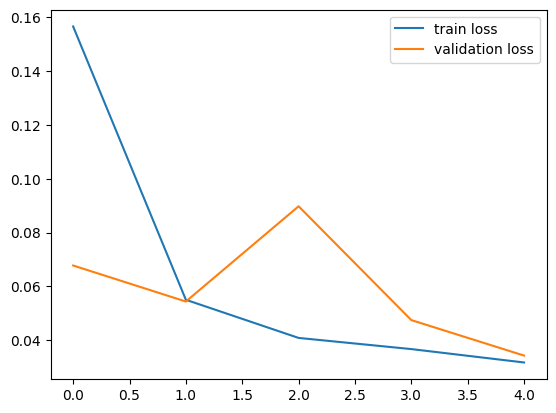

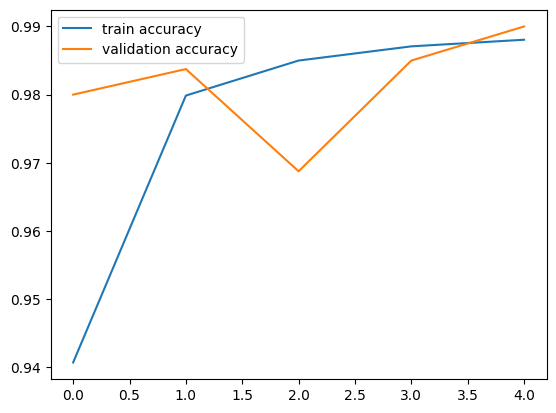

In [29]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Predication System

Path of the image to be predicted: /content/Screenshot 2026-01-28 005155.png


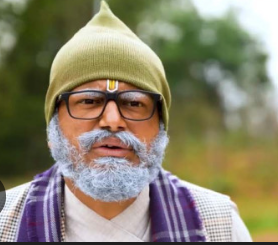

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.9993721]]
0
The person in the image is not wearing a mask


In [31]:
"""input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask""")

Please upload the image file for prediction:


Saving Screenshot 2026-01-28 005155.png to Screenshot 2026-01-28 005155 (3).png


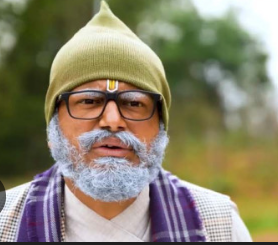

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.9993721]]
The person in the image is not wearing a mask


In [51]:
# to import dataset file in google colab
from google.colab import files
import os

#This will open a file chooser in Colab
print("Please upload the image file for prediction:")
uploaded = files.upload()

# Get the filename from the uploaded dictionary
if uploaded:
    uploaded_filename = list(uploaded.keys())[0]
    # Save the uploaded file to a temporary location
    with open(uploaded_filename, 'wb') as f:
        f.write(uploaded[uploaded_filename])

    input_image_path = uploaded_filename

    input_image = cv2.imread(input_image_path)

    # Check if image was loaded correctly
    if input_image is  None:
        print(f"Error: Could not load image from {input_image_path}. Please check the file format.")
    else:
        cv2_imshow(input_image)

        input_image_resized = cv2.resize(input_image, (128,128))

        input_image_scaled = input_image_resized/255

        input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

        input_prediction = model.predict(input_image_reshaped)

        print(input_prediction)


        # For binary classification with sigmoid output, a threshold is typically used, e.g., 0.5
        # np.argmax is for multi-class where output is a probability distribution over classes
        # Here, a single value close to 0 or 1 is predicted.
        if input_prediction[0][0] > 1:
          print('The person in the image is wearing a mask')
        else:
          print('The person in the image is not wearing a mask')

        # Clean up the temporary file
        os.remove(uploaded_filename)
else:
    print("No file was uploaded.")

### Demonstrating `face_detection_model` with an uploaded image

Please upload an image file for face detection demonstration:


Saving Screenshot 2026-01-28 022804.png to Screenshot 2026-01-28 022804.png
Uploaded file for demonstration: Screenshot 2026-01-28 022804.png


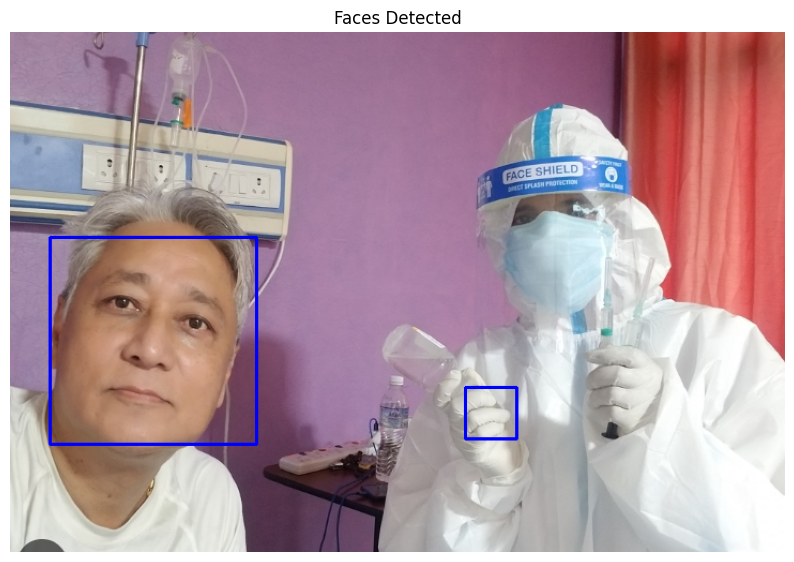

In [115]:
from google.colab import files
import os
import cv2
import matplotlib.pyplot as plt

# Assuming face_detection_model (face_classifier) is already loaded from previous steps
# If not, ensure you run cells that define `haar_cascade_filename` and `face_classifier`

print("Please upload an image file for face detection demonstration:")
uploaded_demo = files.upload()

if uploaded_demo:
    demo_filename = list(uploaded_demo.keys())[0]
    # Save the uploaded file locally
    with open(demo_filename, 'wb') as f:
        f.write(uploaded_demo[demo_filename])

    print(f"Uploaded file for demonstration: {demo_filename}")

    # Load the image for processing
    img_for_detection = cv2.imread(demo_filename)

    if img_for_detection is None:
        print(f"Error: Could not load image from {demo_filename}. Please check file format.")
    else:
        # Convert to grayscale for face detection
        gray_img_for_detection = cv2.cvtColor(img_for_detection, cv2.COLOR_BGR2GRAY)

        # Perform face detection using face_classifier
        # Using `face_classifier` which was loaded as `cv2.CascadeClassifier(haar_cascade_filename)`
        detected_faces = face_classifier.detectMultiScale(
            gray_img_for_detection,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
        )

        # Draw bounding boxes on the original color image
        for (x, y, w, h) in detected_faces:
            cv2.rectangle(img_for_detection, (x, y), (x+w, y+h), (255, 0, 0), 2) # Blue bounding box

        # Display the image with detected faces
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(img_for_detection, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
        plt.title('Faces Detected')
        plt.axis('off')
        plt.show(demo_filename)

   # Clean up the temporary file
      #  os.remove(demo_filename)
      #  print(f"Removed temporary file: {demo_filename}")
#else:
   # print("No image was uploaded for demonstration.")"""

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


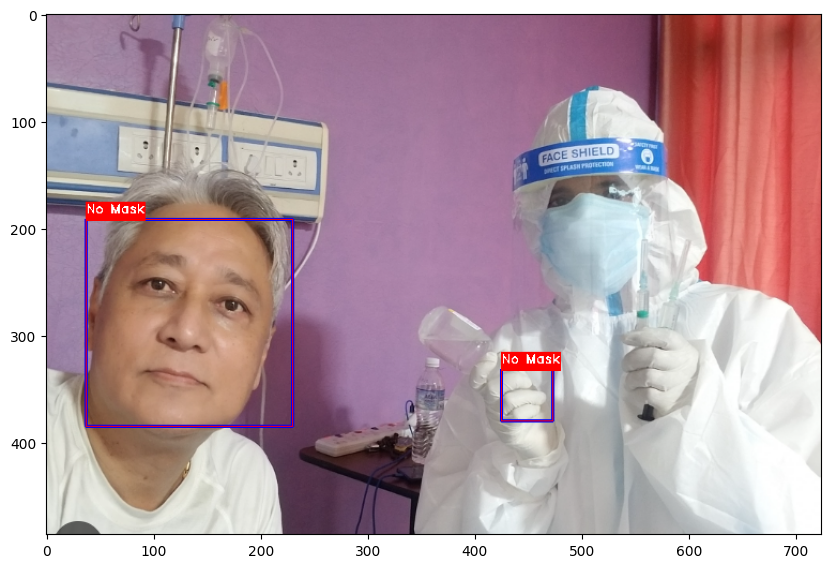

In [116]:
mask_det_label = {0: "No Mask", 1: "Mask"}
mask_det_label_colour = {0: (255, 0, 0), 1: (0, 255, 0)} # Red for No Mask, Green for Mask
pad_y = 1  # padding for result text

demo_filename = cv2.cvtColor(img_for_detection, cv2.COLOR_RGB2BGR)  # colored output image

# For detected faces in the image
for i in range(len(detected_faces)):
    (x, y, w, h) = detected_faces[i]
    cropped_face = demo_filename[y : y + h, x : x + w]
    cropped_face = cv2.resize(cropped_face, (128, 128))
    cropped_face = np.reshape(cropped_face, [1, 128, 128, 3]) / 255.0
    mask_result = model.predict(cropped_face)  # make model prediction
    print_label = mask_det_label[mask_result.argmax()] # get mask/no mask based on prediction
    label_colour = mask_det_label_colour[mask_result.argmax()] # green for mask, red for no mask

    # Print result
    (t_w, t_h), _ = cv2.getTextSize(
        print_label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1
    )  # getting the text size

    cv2.rectangle(
        demo_filename,
        (x, y + pad_y),
        (x + t_w, y - t_h - pad_y - 6),
        label_colour,
        -1,
    )  # draw rectangle

    cv2.putText(
        demo_filename,
        print_label,
        (x, y - 6),
        cv2.FONT_HERSHEY_DUPLEX,
        0.4,
        (255, 255, 255), # white
        1,
    )  # print text

    cv2.rectangle(
        demo_filename,
        (x, y),
        (x + w, y + h),
        label_colour,
        1,
    )  # draw bounding box on face

plt.figure(figsize=(10, 10))
plt.imshow(demo_filename)  # display image